In [63]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from dask.diagnostics import ProgressBar
import cmocean.cm as cmo
import xroms
#%matplotlib notebook
%matplotlib inline

In [64]:
# roms_file = "/srv/scratch/z3097808/20year_run/20year_freerun_output_NEWnci/outer_avg_0*.nc"
# A = xr.open_mfdataset(roms_file, combine='nested', concat_dim="ocean_time", data_vars='minimal'
#                       , drop_variables = ['dstart','ntimes', 'nRST'])

In [65]:
# A.Vtransform[0]

### Using xroms package from https://github.com/bjornaa/xroms

In [68]:
# Initiate the Dataset
A = xroms.roms_mfdataset("/srv/scratch/z3097808/20year_run/20year_freerun_output_NEWnci/outer_avg_09*.nc")

In [69]:
A

<xarray.Dataset>
Dimensions:     (eta_rho: 317, eta_u: 317, eta_v: 316, ocean_time: 749, s_rho: 30, s_w: 31, xi_rho: 272, xi_u: 271, xi_v: 272)
Coordinates:
    lon_rho     (eta_rho, xi_rho) float64 147.1 147.1 147.2 ... 162.2 162.2
    lat_rho     (eta_rho, xi_rho) float64 -38.5 -38.51 -38.52 ... -28.15 -28.16
  * ocean_time  (ocean_time) datetime64[ns] 2014-09-13T12:00:00 ... 2016-09-30T12:00:00
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w         (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
    lat_v       (eta_v, xi_v) float64 dask.array<chunksize=(316, 272), meta=np.ndarray>
    lon_v       (eta_v, xi_v) float64 dask.array<chunksize=(316, 272), meta=np.ndarray>
    lat_u       (eta_u, xi_u) float64 dask.array<chunksize=(317, 271), meta=np.ndarray>
    lon_u       (eta_u, xi_u) float64 dask.array<chunksize=(317, 271), meta=np.ndarray>
  * xi_rho      (xi_rho) int64 0 1 2 3 4 5 6 7 ... 265 266 267 268 269 270 271
  * eta_rho     (eta_rho) int64 0 1 2 3 4 5 6 7 ... 310 311 312 313 314 315 316
  * xi_u        (xi_u) float64 0.5 1.5 2.5 3.5 4.5 ... 267.5 268.5 269.5 270.5
  * xi_v        (xi_v) int64 0 1 2 3 4 5 6 7 ... 264 265 266 267 268 269 270 271
  * eta_u       (eta_u) int64 0 1 2 3 4 5 6 7 ... 310 311 312 313 314 315 316
  * eta_v       (eta_v) float64 0.5 1.5 2.5 3.5 4.5 ... 312.5 313.5 314.5 315.5
    z_rho       (s_rho, eta_rho, xi_rho) float32 -33.26822 ... -5.275862
    z_w         (s_w, eta_rho, xi_rho) float32 -33.819714 -33.819714 ... 0.0 0.0
Data variables:
    mask_rho    (eta_rho, xi_rho) float64 dask.array<chunksize=(317, 272), meta=np.ndarray>
    h           (eta_rho, xi_rho) float64 dask.array<chunksize=(317, 272), meta=np.ndarray>
    pm          (eta_rho, xi_rho) float64 dask.array<chunksize=(317, 272), meta=np.ndarray>
    pn          (eta_rho, xi_rho) float64 dask.array<chunksize=(317, 272), meta=np.ndarray>
    zeta        (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(30, 317, 272), meta=np.ndarray>
    u           (ocean_time, s_rho, eta_u, xi_u) float32 dask.array<chunksize=(30, 30, 317, 271), meta=np.ndarray>
    v           (ocean_time, s_rho, eta_v, xi_v) float32 dask.array<chunksize=(30, 30, 316, 272), meta=np.ndarray>
    temp        (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(30, 30, 317, 272), meta=np.ndarray>
    salt        (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(30, 30, 317, 272), meta=np.ndarray>
Attributes:
    file:              outer_avg.nc
    format:            netCDF-3 classic file
    Conventions:       CF-1.4
    type:              ROMS/TOMS averages file
    title:             EAC OUTER GRID
    rst_file:          outer_rst.nc
    avg_file:          outer_avg.nc
    grd_file:          /short/fu5/cgk561/eac/20year_freerun/grid/EACouter_var...
    ini_file:          ini.nc
    frc_file_01:       /short/fu5/cgk561/eac/20year_freerun/ncep/eac_ncep_199...
    frc_file_02:       /short/fu5/cgk561/eac/20year_freerun/Qcorrection/qcorr...
    bry_file:          /short/fu5/cgk561/eac/20year_freerun/bluelink/files/br...
    script_file:       ocean.in
    svn_url:           https:://myroms.org/svn/src
    svn_rev:           exported
    code_dir:          /home/561/cgk561/roms/src
    header_dir:        /home/561/cgk561/eac/20year_freerun_NEW
    header_file:       eac.h
    os:                Linux
    cpu:               x86_64
    compiler_system:   ifort
    compiler_command:  /apps/openmpi/wrapper/fortran/mpif90
    compiler_flags:    -heap-arrays -fp-model precise -ip -O3 -free
    tiling:            003x004
    history:           ROMS/TOMS, Version 3.4, Wednesday - August 9, 2017 -  ...
    ana_file:          /home/561/cgk561/eac/20year_freerun_NEW/include/ana_bt...
    CPP_options:       EAC, ANA_BSFLUX, ANA_BTFLUX, ASSUMED_SHAPE, AVERAGES, ...

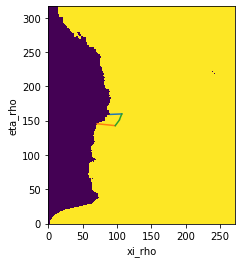

In [70]:
# Define a linear section, draw in map for quick control

#northern section
nlon0, nlat0 = 152.5, -32.5
nlon1, nlat1 = 152.93, -32.6
# Take 50 equidistant points along the section
nlon = np.linspace(nlon0, nlon1, 50)
nlat = np.linspace(nlat0, nlat1, 50)
# Transform to grid coordinates
nX, nY = xroms.ll2xy(A, nlon, nlat)

#southern section
slon0, slat0 = 151.7817, -32.9283
slon1, slat1 = 152.4, -33.25
# Take 50 equidistant points along the section
slon = np.linspace(slon0, slon1, 50)
slat = np.linspace(slat0, slat1, 50)
# Transform to grid coordinates
sX, sY = xroms.ll2xy(A, slon, slat)

#eastern section
# Take 50 equidistant points along the section
mlon = 152.71
#mlat
elon = np.concatenate(((np.linspace(nlon1, mlon, 25)),(np.linspace(mlon, slon1, 25))),axis=0)
elat = np.linspace(nlat1, slat1, 50)
# Transform to grid coordinates
eX, eY = xroms.ll2xy(A, elon, elat)


# Plot
A.mask_rho.plot(add_colorbar=False)
plt.plot(nX, nY)
plt.plot(sX, sY)
plt.plot(eX, eY)
plt.axis('image');

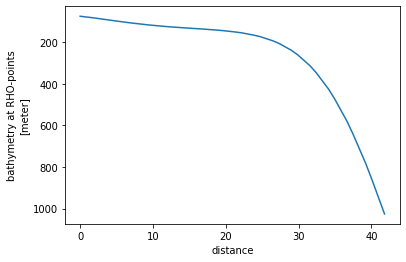

In [71]:
#plot bathymetry of northern section
nB = xroms.section(A, nX, nY)
# Plot depth along section
nB.h.plot(yincrease=False);

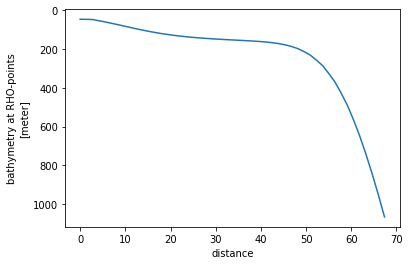

In [72]:
#plot bathymetry of southern section
sB = xroms.section(A, sX, sY)
# Plot depth along section
sB.h.plot(yincrease=False);

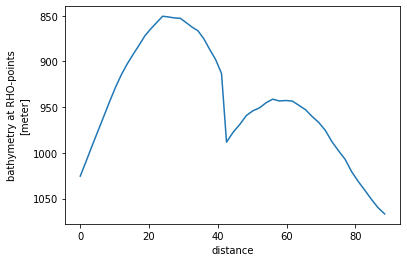

In [73]:
#plot bathymetry of eastern section
eB = xroms.section(A, eX, eY)
# Plot depth along section
eB.h.plot(yincrease=False);

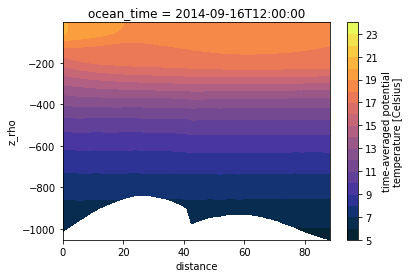

In [74]:
T = eB.temp.isel(ocean_time=3)
levels = np.arange(5, 25, 1)
T.plot.contourf('distance', 'z_rho', levels=levels, cmap=cmo.thermal)

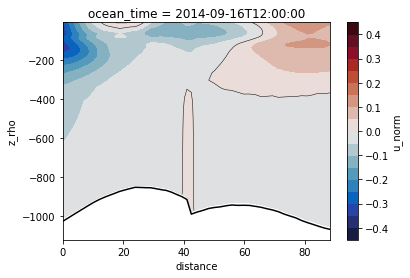

In [75]:
U = eB.isel(ocean_time=3).u_norm
levels=np.arange(-0.45, 0.5, 0.05)
U.plot.contourf('distance', 'z_rho', levels=levels, cmap=cmo.balance)
# Add the zero velocity contour
U.plot.contour('distance', 'z_rho', levels=[0], colors='black', linewidths=0.5)
# Add the bottom profile
plt.plot(eB.distance, -eB.h, color='black');

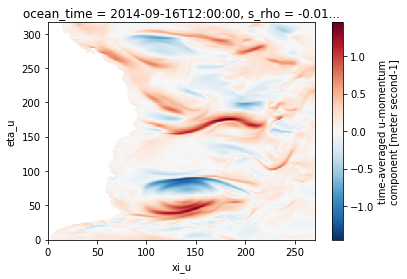

In [76]:
A.u.isel(ocean_time=3, s_rho=-1).plot()

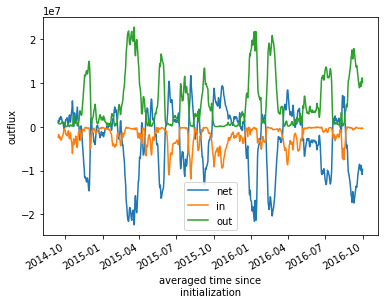

In [77]:
# Geometry
length = eB.dS.sum()
depthmean = (eB.h * eB.dS).sum() / length
TotArea = eB.area.sum()

# Hydrography
tempmean = (eB.area * eB.temp).sum() / TotArea
#temp8p = eB.area.where(eB.temp > 8).sum()

# Flux
flux = (eB.area * eB.u_norm)
eB['netflux'] = flux.sum(dim=['s_rho','distance'])*-1
eB['outflux'] = flux.where(eB.u_norm > 0).sum(['s_rho','distance'])
eB['influx'] = flux.where(eB.u_norm < 0).sum(['s_rho','distance'])
freshflux = flux.where(eB.salt < 34.9).sum(['s_rho','distance'])


# Add heat flux, salt flux
rho = 1025        # Sea water density, kg/m³
heat_cap = 4000.0 # Heat capacity, J/(kg K)
Tref = 0.0        # Reference temperature, °C

Tflux = rho * heat_cap * (flux * eB.temp).sum(['s_rho','distance'])
Sflux = rho * (flux * eB.salt).sum(['s_rho','distance'])

eB.netflux.plot(label = 'net')
influx = eB.influx.plot(label = 'in')
outflux = eB.outflux.plot(label = 'out')
plt.legend()

/home/z3526974/miniconda3/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/home/z3526974/miniconda3/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


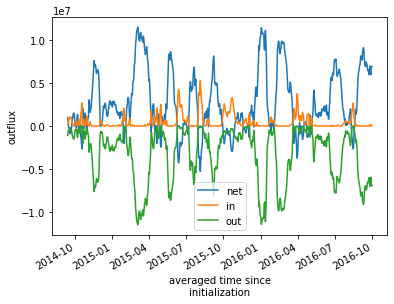

In [78]:
# Geometry
length = nB.dS.sum()
depthmean = (nB.h * nB.dS).sum() / length
TotArea = nB.area.sum()

# Hydrography
tempmean = (nB.area * nB.temp).sum() / TotArea
#temp8p = nB.area.where(nB.temp > 8).sum()

# Flux
flux = (nB.area * nB.u_norm)
nB['netflux'] = flux.sum(dim=['s_rho','distance'])*-1
nB['outflux'] = flux.where(nB.u_norm < 0).sum(['s_rho','distance'])
nB['influx'] = flux.where(nB.u_norm > 0).sum(['s_rho','distance'])
freshflux = flux.where(nB.salt < 34.9).sum(['s_rho','distance'])


# Add heat flux, salt flux
rho = 1025        # Sea water density, kg/m³
heat_cap = 4000.0 # Heat capacity, J/(kg K)
Tref = 0.0        # Reference temperature, °C

Tflux = rho * heat_cap * (flux * nB.temp).sum(['s_rho','distance'])
Sflux = rho * (flux * nB.salt).sum(['s_rho','distance'])

nB.netflux.plot(label = 'net')
influx = nB.influx.plot(label = 'in')
outflux = nB.outflux.plot(label = 'out')
plt.legend()

/home/z3526974/miniconda3/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/home/z3526974/miniconda3/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in less
  return func(*(_execute_task(a, cache) for a in args))


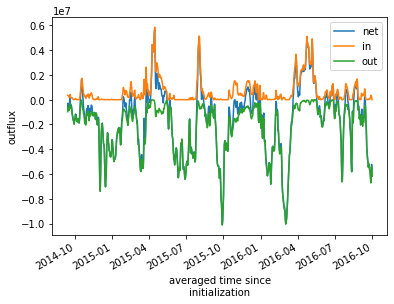

In [79]:
# Geometry
length = sB.dS.sum()
depthmean = (sB.h * sB.dS).sum() / length
TotArea = sB.area.sum()

# Hydrography
tempmean = (sB.area * sB.temp).sum() / TotArea
#temp8p = sB.area.where(sB.temp > 8).sum()

# Flux
flux = (sB.area * sB.u_norm)
sB['netflux'] = flux.sum(dim=['s_rho','distance'])
sB['outflux'] = flux.where(sB.u_norm < 0).sum(['s_rho','distance'])
sB['influx'] = flux.where(sB.u_norm > 0).sum(['s_rho','distance'])
freshflux = flux.where(sB.salt < 34.9).sum(['s_rho','distance'])


# Add heat flux, salt flux
rho = 1025        # Sea water density, kg/m³
heat_cap = 4000.0 # Heat capacity, J/(kg K)
Tref = 0.0        # Reference temperature, °C

Tflux = rho * heat_cap * (flux * sB.temp).sum(['s_rho','distance'])
Sflux = rho * (flux * sB.salt).sum(['s_rho','distance'])

sB.netflux.plot(label = 'net')
influx = sB.influx.plot(label = 'in')
outflux = sB.outflux.plot(label = 'out')
plt.legend()

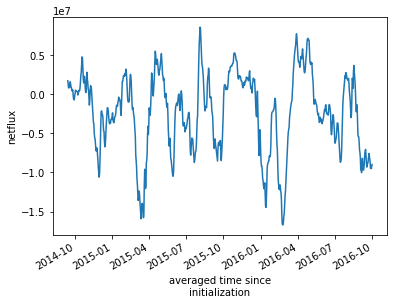

In [80]:
residual = nB.netflux + sB.netflux + eB.netflux
residual.plot()

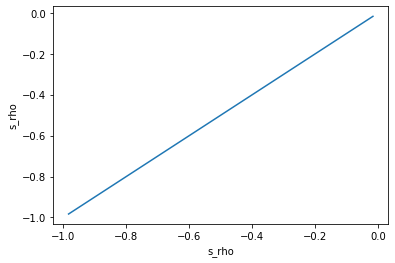

In [82]:
flux.s_rho.plot()